In [275]:
using Plots

In [276]:
# Define os pesos para os pontos de integração (argumentos: nint -> número de pontos de integração)

function we(nint)
    w = zeros(nint)
    if(nint == 2)
        w[1] = 1.0
        w[2] = 1.0
    elseif(nint == 3)
        w[1] = 5/9
        w[2] = 8/9
        w[3] = 5/9
    elseif(nint == 4)
        w[1] = (18-sqrt(30.))/36;
        w[2] = (18+sqrt(30.))/36;
        w[3] = (18+sqrt(30.))/36;
        w[4] = (18-sqrt(30.))/36;
    elseif(nint == 5)
        w[1] = (322-13*sqrt(70))/900;
        w[2] = (322+13*sqrt(70))/900;
        w[3] =  128/225;
        w[4] = (322+13*sqrt(70))/900;
        w[5] = (322-13*sqrt(70))/900;
    end
    return w
end
;

# Define os pontos de integração (argumentos: nint -> número de pontos de integração)
function pe(nint)
    pt = zeros(nint)
    if(nint == 2)
        pt[1] = -sqrt(3.)/3.;
        pt[2] = sqrt(3.)/3.;
    elseif(nint == 3)
        pt[1] = sqrt(3/5);
        pt[2] = 0;
        pt[3] = -sqrt(3/5);
    elseif(nint == 4)
        pt[1] = sqrt((3+2*sqrt(6/5))/7);
        pt[2] = sqrt((3-2*sqrt(6/5))/7);
        pt[3] = -sqrt((3-2*sqrt(6/5))/7);
        pt[4] = -sqrt((3+2*sqrt(6/5))/7);
    elseif(nint == 5)
        pt[1] = -(1/3)*sqrt((5+2*sqrt(10/7)));
        pt[2] = -(1/3)*sqrt((5-2*sqrt(10/7)));
        pt[3] =   0;
        pt[4] = +(1/3)*sqrt((5-2*sqrt(10/7)));
        pt[5] = +(1/3)*sqrt((5+2*sqrt(10/7)));
    end
    
    return pt
end
;

In [277]:
# Função que define os polinômios de integração (argumentos: typ -> se é o polinômio [1] ou a derivada do polinômio [0]; nen -> número de nós do elemento; nint -> número de pontos de integração)

function shl(typ, nen, nint)
    
    pt = pe(nint)
    w = we(nint)
    # print("line 3.2.1")
    # if(nint == 2)
    #     pt[1] = -sqrt(3.)/3.;
    #     pt[2] = sqrt(3.)/3.;
    #     w[1] = 1.;
    #     w[2] = 1.;
    # elseif(nint == 3)
    #     pt[1] = sqrt(3/5);
    #     pt[2] = 0;
    #     pt[3] = -sqrt(3/5);
    #     w[1] = 5/9;
    #     w[2] = 8/9;
    #     w[3] = 5/9;
    # elseif(nint == 4)
    #     pt[1] = sqrt((3+2*sqrt(6/5))/7);
    #     pt[2] = sqrt((3-2*sqrt(6/5))/7);
    #     pt[3] = -sqrt((3-2*sqrt(6/5))/7);
    #     pt[4] = -sqrt((3+2*sqrt(6/5))/7);
    #     w[1] = (18-sqrt(30.))/36;
    #     w[2] = (18+sqrt(30.))/36;
    #     w[3] = (18+sqrt(30.))/36;
    #     w[4] = (18-sqrt(30.))/36;
    # elseif(nint == 5)
    #     pt[1] = -(1/3)*sqrt((5+2*sqrt(10/7)));
    #     pt[2] = -(1/3)*sqrt((5-2*sqrt(10/7)));
    #     pt[3] =   0;
    #     pt[4] = +(1/3)*sqrt((5-2*sqrt(10/7)));
    #     pt[5] = +(1/3)*sqrt((5+2*sqrt(10/7)));
    #     w[1] = (322-13*sqrt(70))/900;
    #     w[2] = (322+13*sqrt(70))/900;
    #     w[3] =  128/225;
    #     w[4] = (322+13*sqrt(70))/900;
    #     w[5] = (322-13*sqrt(70))/900;
    # end
    if(typ == 1)
        sh = zeros(nen, nint)
        for l=1:nint
            t=pt[l];
            if(nen==2)
                sh[1,l] = (1.0-t)/2.0;
                sh[2,l] = (1.0+t)/2.0;
            elseif(nen==3)
                sh[1,l] = t*(t-1.0)/2.0;
                sh[2,l] = -(t-1)*(t+1);
                sh[3,l] = t*(t+1.0)/2.0;
            elseif(nen==4)
                sh[1,l] = -( 9/16)*(t+(1/3))*(t-(1/3))*(t-1);
                sh[2,l] =  (27/16)*(t+1)    *(t-(1/3))*(t-1);
                sh[3,l] = -(27/16)*(t+1)    *(t+(1/3))*(t-1);
                sh[4,l] =  ( 9/16)*(t+1)    *(t+(1/3))*(t-(1/3));
            elseif(nen==5)
                sh[1,l] =  (2/3)*(t+(1/2))*t*(t-(1/2))*(t-1);
                sh[2,l] = -(8/3)*(t+1)*t*(t-(1/2))*(t-1);
                sh[3,l] =      4*(t+1)*(t+(1/2))*(t-(1/2))*(t-1);
                sh[4,l] = -(8/3)*(t+1)*(t+(1/2))*t*(t-1);
                sh[5,l] =  (2/3)*(t+1)*(t+(1/2))*t*(t-(1/2)); 
            end
        end
        return sh
    elseif(typ == 2)
        dsh = zeros(nen, nint)
        for l=1:nint
            t=pt[l];
            if(nen==2)
                dsh[1,l] = (-1.0)/2.0;
                dsh[2,l] = (1.0)/2.0;
            elseif(nen==3)
                dsh[1,l] = (2*t + 1)/2.0;
                dsh[2,l] = -2*t;
                dsh[3,l] = (2*t - 1)/2.0;
            elseif(nen==4)
                dsh[1,l] = -(27*t*t - 18*t - 1)/16;
                dsh[2,l] = 9*(9*t*t - 2*t - 3)/16;
                dsh[3,l] = -9*(9*t*t + 2*t - 3)/16;
                dsh[4,l] = +(27*t*t + 18*t - 1)/16;
            elseif(nen==5)
                dsh[1,l] = (16*(t^3) - 12*(t^2) - 2*t + 1)/6;
                dsh[2,l] = -4*(8*(t^3) - 3*(t^2) - 4*t + 1)/3;
                dsh[3,l] = (16*(t^3) - 10*t)
                dsh[4,l] = -4*(8*(t^3) + 3*(t^2) - 4*t - 1)/3;
                dsh[5,l] = (16*(t^3) + 12*(t^2) - 2*t - 1)/6;
            end
        end
        return dsh
    end
end
;

In [278]:
# Define os intervalos reais do elemento

a = 0
b = +1.5
;

In [279]:
function u(x)
    return sin(pi*x)
end
;

function du(x)
    return pi * cos(pi*x)
end
;

function trans_x(t, x1, x2)
    return t*(x2 - x1)/2 + (x1 + x2)/2
end

function u_correct(t, x1, x2)
    return pi^2 * sin(pi * trans_x(t, x1, x2))
end
;

Para k = 1 e nel = 4 e nen = 2 e nint = 2
SHG:
[0.7886751345948129, 0.21132486540518713]
[0.21132486540518713, 0.7886751345948129]

DSHG original:
[0.5, 0.5]
[-0.5, -0.5]
0
-3.141592653589793


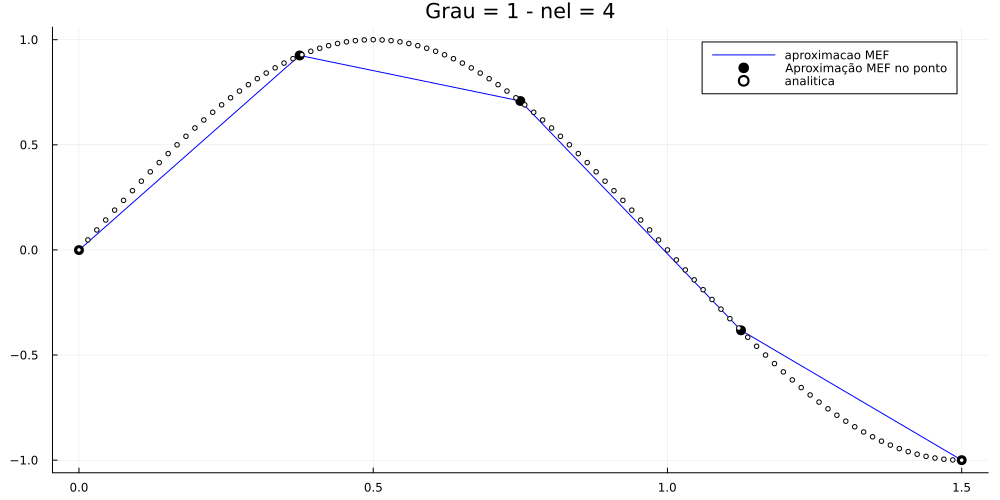

Para k = 2 e nel = 4 e nen = 3 e nint = 3
SHG:
[-0.08729833462074169, -0.0, 0.6872983346207417]
[0.39999999999999997, 1.0, 0.39999999999999997]
[0.6872983346207417, 0.0, -0.08729833462074169]

DSHG original:
[-1.2745966692414834, -0.5, 0.2745966692414834]
[1.5491933384829668, -0.0, -1.5491933384829668]
[-0.2745966692414834, 0.5, 1.2745966692414834]
0
-3.141592653589793


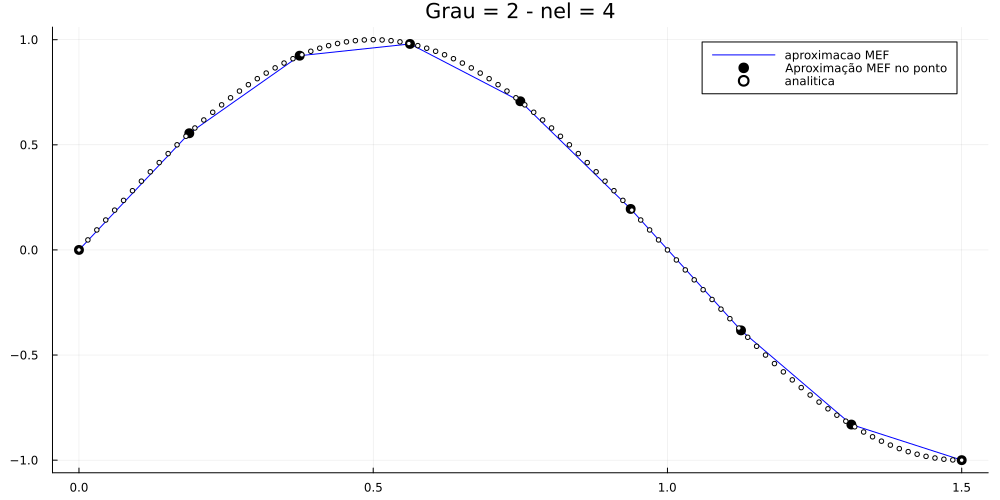

Para k = 3 e nel = 4 e nen = 4 e nint = 4
SHG:
[0.04924455046623183, 0.0016617623139064115, 0.003373736432772566, 0.6600056650728034]
[-0.23018790325073898, -0.009921353572324754, 1.0048858548256459, 0.5209376877117037]
[0.5209376877117037, 1.0048858548256459, -0.009921353572324754, -0.23018790325073896]
[0.6600056650728034, 0.0033737364327725665, 0.0016617623139064115, 0.049244550466231836]

DSHG original:
[0.22009697276524376, -0.24992542591294495, 0.5150319221529818, 2.157653673851862]
[-1.0978476193823505, 1.484818929672908, 0.7198615816069813, -3.035404320468969]
[3.035404320468969, -0.7198615816069813, -1.484818929672908, 1.0978476193823505]
[-2.157653673851862, -0.5150319221529818, 0.24992542591294495, -0.22009697276524376]
0
-3.141592653589793


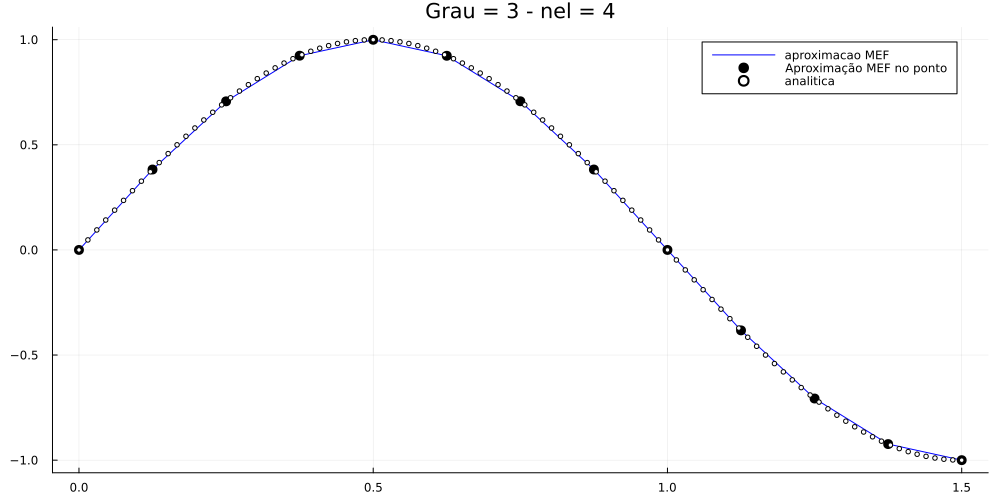

Para k = 4 e nel = 4 e nen = 5 e nint = 5
SHG:
[0.6577278825775881, 0.022063103295100202, 0.0, -0.006618786099995509, -0.03237267008427455]
[0.6076926946610149, 1.0587971821717581, -0.0, 0.03922234075058373, 0.1755341081074129]
[-0.40858201526174176, -0.11346384011744672, 1.0, -0.11346384011744673, -0.40858201526174176]
[0.17553410810741288, 0.03922234075058373, 0.0, 1.0587971821717581, 0.607692694661015]
[-0.03237267008427455, -0.00661878609999551, -0.0, 0.0220631032951002, 0.6577278825775882]

DSHG original:
[3.157918213674122, 0.6500852780101328, -0.16666666666666666, 0.17637818035929462, -0.20660389426577222]
[-5.055639151533484, 1.3799995867516284, 1.3333333333333333, -1.0329265034904829, 1.153010512716783]
[2.8441275563103705, -2.8866331878929494, 0.0, 2.8866331878929494, -2.8441275563103705]
[-1.153010512716783, 1.0329265034904829, -1.3333333333333333, -1.3799995867516284, 5.055639151533484]
[0.20660389426577222, -0.17637818035929462, 0.16666666666666666, -0.6500852780101328, -3

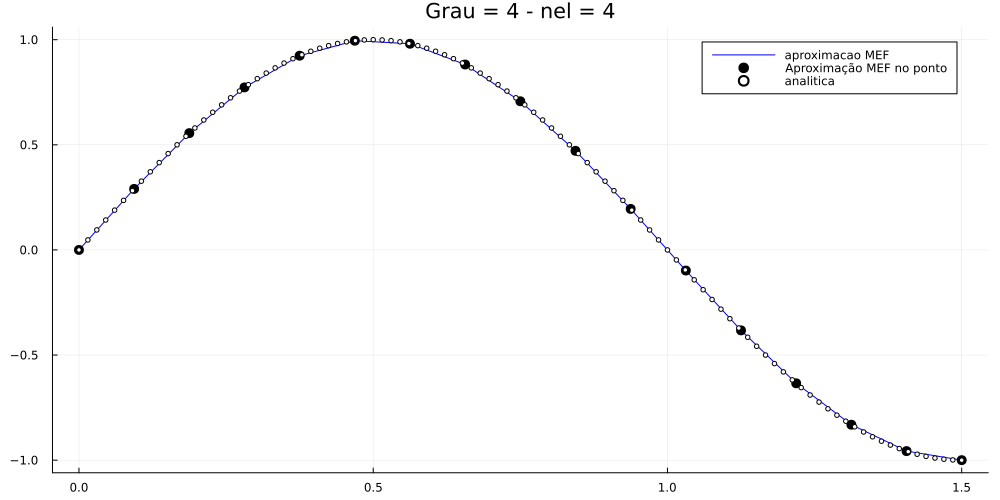

Para k = 1 e nel = 16 e nen = 2 e nint = 2
SHG:
[0.7886751345948129, 0.21132486540518713]
[0.21132486540518713, 0.7886751345948129]

DSHG original:
[0.5, 0.5]
[-0.5, -0.5]
0
-3.141592653589793


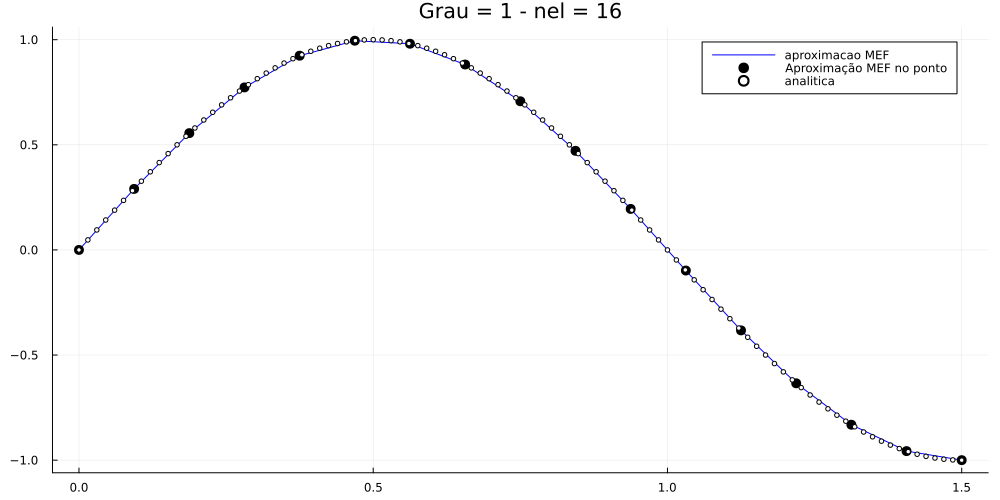

Para k = 2 e nel = 16 e nen = 3 e nint = 3
SHG:
[-0.08729833462074169, -0.0, 0.6872983346207417]
[0.39999999999999997, 1.0, 0.39999999999999997]
[0.6872983346207417, 0.0, -0.08729833462074169]

DSHG original:
[-1.2745966692414834, -0.5, 0.2745966692414834]
[1.5491933384829668, -0.0, -1.5491933384829668]
[-0.2745966692414834, 0.5, 1.2745966692414834]
0
-3.141592653589793


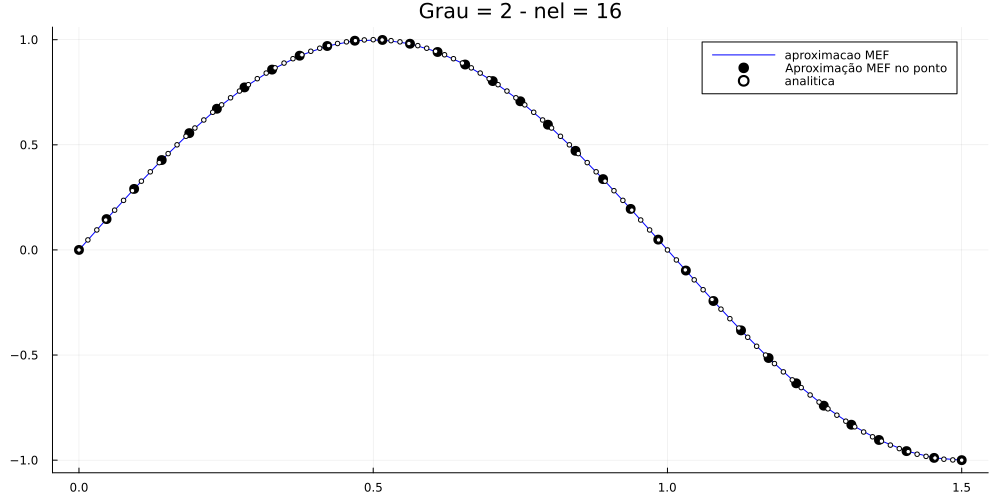

Para k = 3 e nel = 16 e nen = 4 e nint = 4
SHG:
[0.04924455046623183, 0.0016617623139064115, 0.003373736432772566, 0.6600056650728034]
[-0.23018790325073898, -0.009921353572324754, 1.0048858548256459, 0.5209376877117037]
[0.5209376877117037, 1.0048858548256459, -0.009921353572324754, -0.23018790325073896]
[0.6600056650728034, 0.0033737364327725665, 0.0016617623139064115, 0.049244550466231836]

DSHG original:
[0.22009697276524376, -0.24992542591294495, 0.5150319221529818, 2.157653673851862]
[-1.0978476193823505, 1.484818929672908, 0.7198615816069813, -3.035404320468969]
[3.035404320468969, -0.7198615816069813, -1.484818929672908, 1.0978476193823505]
[-2.157653673851862, -0.5150319221529818, 0.24992542591294495, -0.22009697276524376]
0
-3.141592653589793


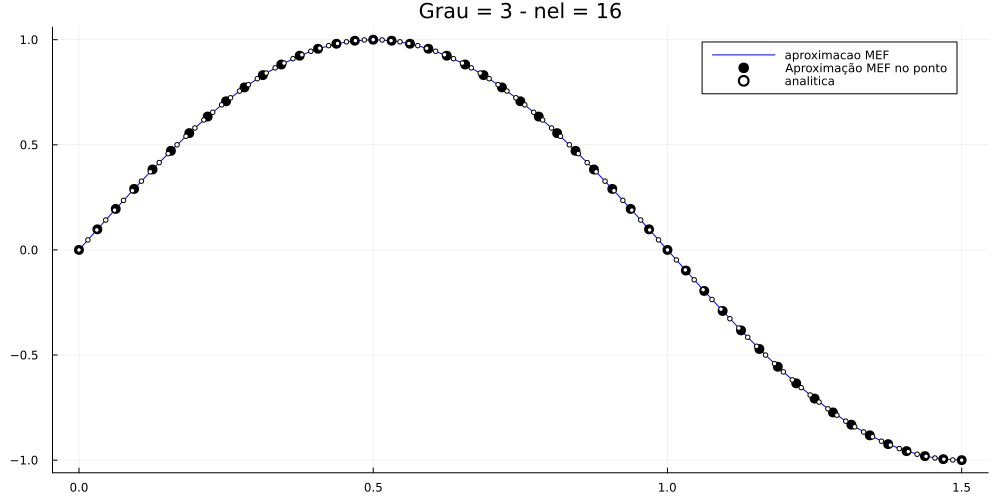

Para k = 4 e nel = 16 e nen = 5 e nint = 5
SHG:
[0.6577278825775881, 0.022063103295100202, 0.0, -0.006618786099995509, -0.03237267008427455]
[0.6076926946610149, 1.0587971821717581, -0.0, 0.03922234075058373, 0.1755341081074129]
[-0.40858201526174176, -0.11346384011744672, 1.0, -0.11346384011744673, -0.40858201526174176]
[0.17553410810741288, 0.03922234075058373, 0.0, 1.0587971821717581, 0.607692694661015]
[-0.03237267008427455, -0.00661878609999551, -0.0, 0.0220631032951002, 0.6577278825775882]

DSHG original:
[3.157918213674122, 0.6500852780101328, -0.16666666666666666, 0.17637818035929462, -0.20660389426577222]
[-5.055639151533484, 1.3799995867516284, 1.3333333333333333, -1.0329265034904829, 1.153010512716783]
[2.8441275563103705, -2.8866331878929494, 0.0, 2.8866331878929494, -2.8441275563103705]
[-1.153010512716783, 1.0329265034904829, -1.3333333333333333, -1.3799995867516284, 5.055639151533484]
[0.20660389426577222, -0.17637818035929462, 0.16666666666666666, -0.6500852780101328, -

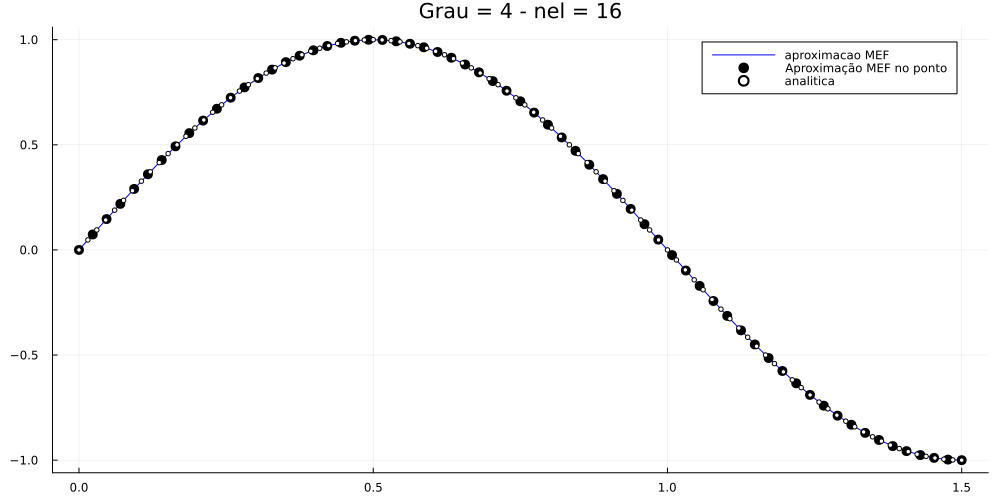

Para k = 1 e nel = 64 e nen = 2 e nint = 2
SHG:
[0.7886751345948129, 0.21132486540518713]
[0.21132486540518713, 0.7886751345948129]

DSHG original:
[0.5, 0.5]
[-0.5, -0.5]
0
-3.141592653589793


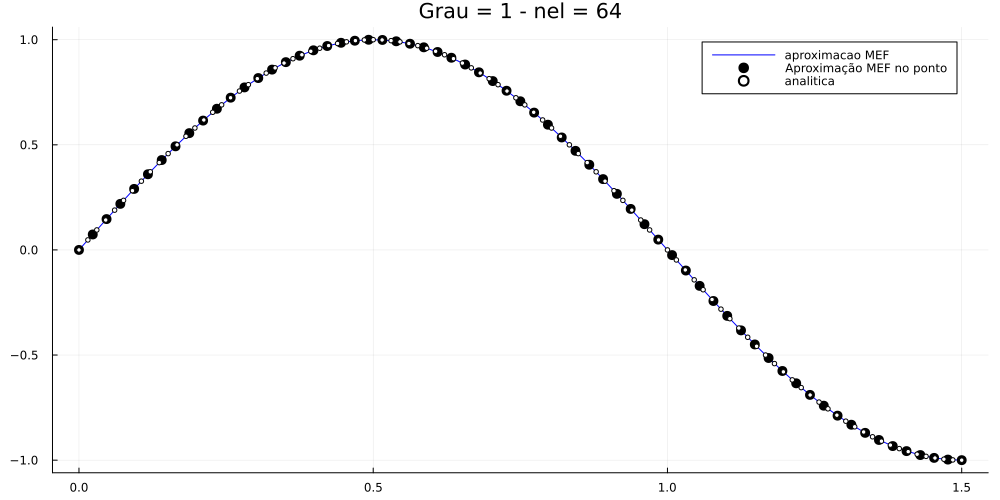

Para k = 2 e nel = 64 e nen = 3 e nint = 3
SHG:
[-0.08729833462074169, -0.0, 0.6872983346207417]
[0.39999999999999997, 1.0, 0.39999999999999997]
[0.6872983346207417, 0.0, -0.08729833462074169]

DSHG original:
[-1.2745966692414834, -0.5, 0.2745966692414834]
[1.5491933384829668, -0.0, -1.5491933384829668]
[-0.2745966692414834, 0.5, 1.2745966692414834]
0
-3.141592653589793


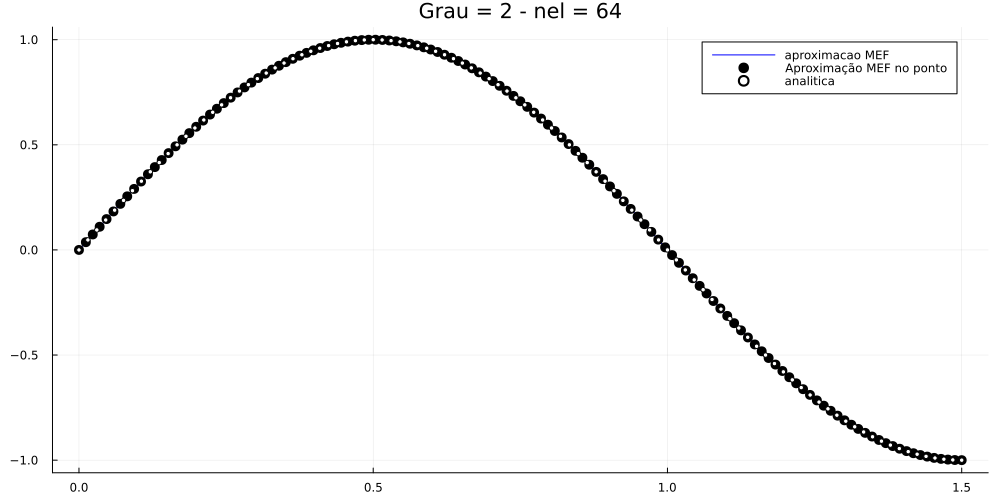

Para k = 3 e nel = 64 e nen = 4 e nint = 4
SHG:
[0.04924455046623183, 0.0016617623139064115, 0.003373736432772566, 0.6600056650728034]
[-0.23018790325073898, -0.009921353572324754, 1.0048858548256459, 0.5209376877117037]
[0.5209376877117037, 1.0048858548256459, -0.009921353572324754, -0.23018790325073896]
[0.6600056650728034, 0.0033737364327725665, 0.0016617623139064115, 0.049244550466231836]

DSHG original:
[0.22009697276524376, -0.24992542591294495, 0.5150319221529818, 2.157653673851862]
[-1.0978476193823505, 1.484818929672908, 0.7198615816069813, -3.035404320468969]
[3.035404320468969, -0.7198615816069813, -1.484818929672908, 1.0978476193823505]
[-2.157653673851862, -0.5150319221529818, 0.24992542591294495, -0.22009697276524376]
0
-3.141592653589793


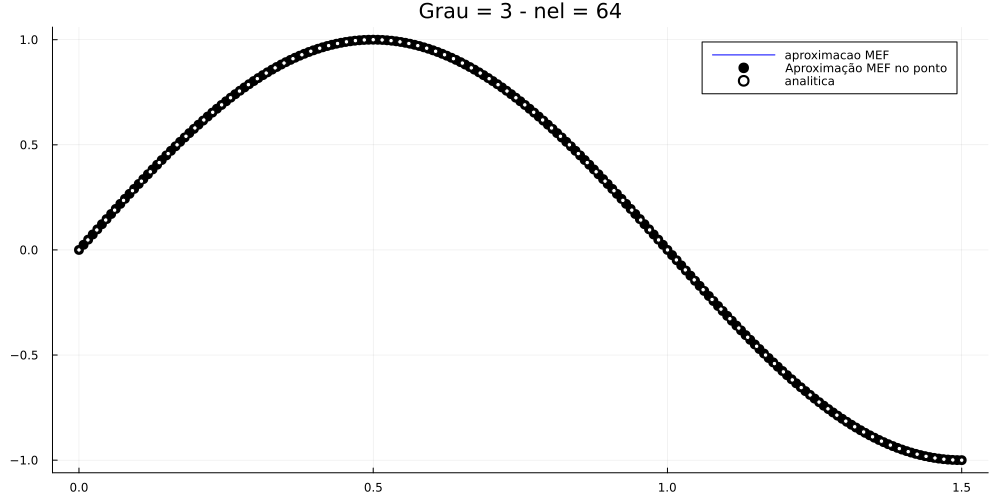

Para k = 4 e nel = 64 e nen = 5 e nint = 5
SHG:
[0.6577278825775881, 0.022063103295100202, 0.0, -0.006618786099995509, -0.03237267008427455]
[0.6076926946610149, 1.0587971821717581, -0.0, 0.03922234075058373, 0.1755341081074129]
[-0.40858201526174176, -0.11346384011744672, 1.0, -0.11346384011744673, -0.40858201526174176]
[0.17553410810741288, 0.03922234075058373, 0.0, 1.0587971821717581, 0.607692694661015]
[-0.03237267008427455, -0.00661878609999551, -0.0, 0.0220631032951002, 0.6577278825775882]

DSHG original:
[3.157918213674122, 0.6500852780101328, -0.16666666666666666, 0.17637818035929462, -0.20660389426577222]
[-5.055639151533484, 1.3799995867516284, 1.3333333333333333, -1.0329265034904829, 1.153010512716783]
[2.8441275563103705, -2.8866331878929494, 0.0, 2.8866331878929494, -2.8441275563103705]
[-1.153010512716783, 1.0329265034904829, -1.3333333333333333, -1.3799995867516284, 5.055639151533484]
[0.20660389426577222, -0.17637818035929462, 0.16666666666666666, -0.6500852780101328, -

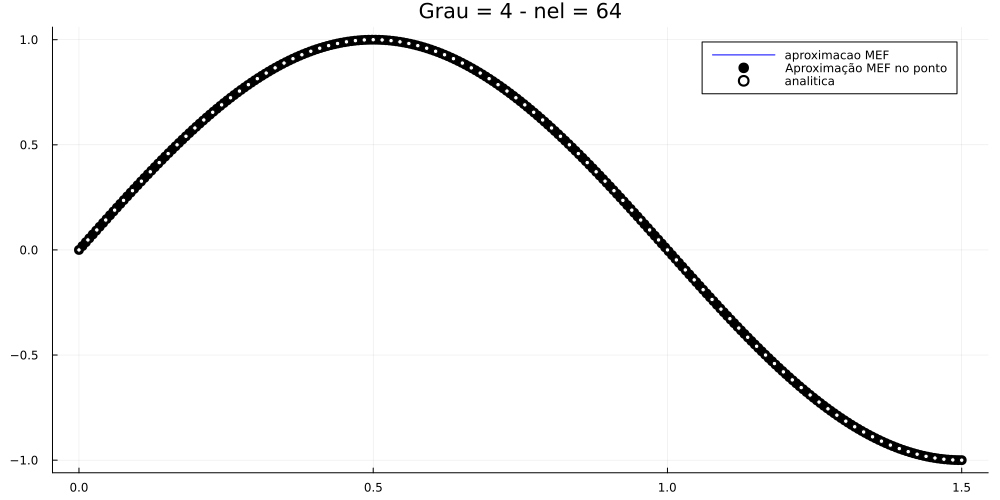

Para k = 1 e nel = 256 e nen = 2 e nint = 2
SHG:
[0.7886751345948129, 0.21132486540518713]
[0.21132486540518713, 0.7886751345948129]

DSHG original:
[0.5, 0.5]
[-0.5, -0.5]
0
-3.141592653589793


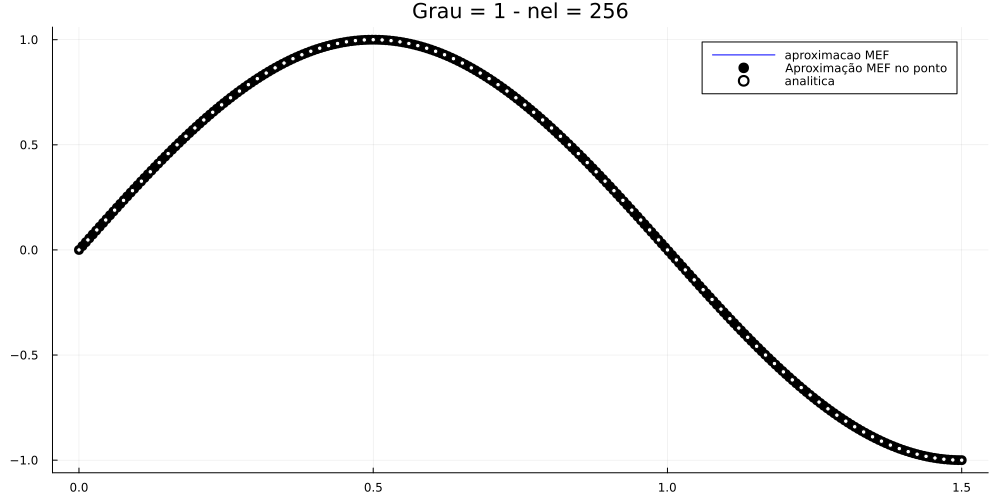

Para k = 2 e nel = 256 e nen = 3 e nint = 3
SHG:
[-0.08729833462074169, -0.0, 0.6872983346207417]
[0.39999999999999997, 1.0, 0.39999999999999997]
[0.6872983346207417, 0.0, -0.08729833462074169]

DSHG original:
[-1.2745966692414834, -0.5, 0.2745966692414834]
[1.5491933384829668, -0.0, -1.5491933384829668]
[-0.2745966692414834, 0.5, 1.2745966692414834]
0
-3.141592653589793


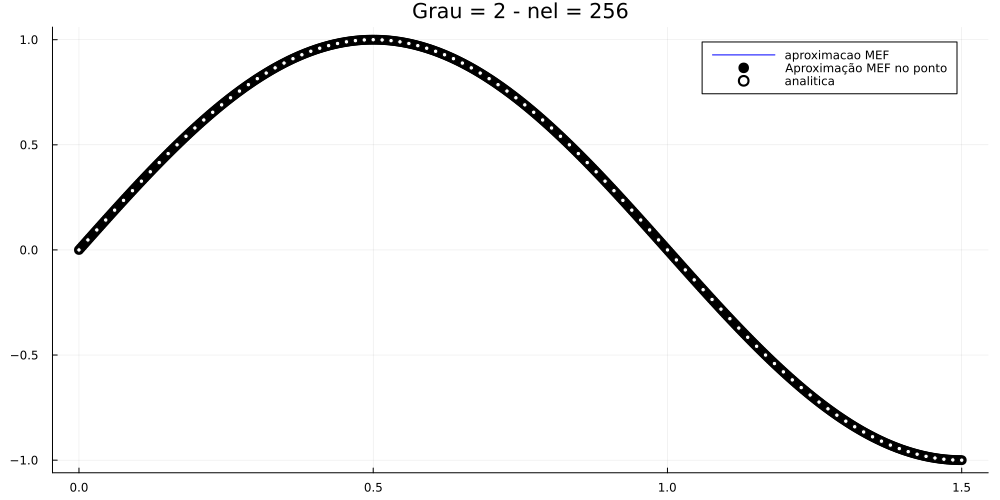

Para k = 3 e nel = 256 e nen = 4 e nint = 4
SHG:
[0.04924455046623183, 0.0016617623139064115, 0.003373736432772566, 0.6600056650728034]
[-0.23018790325073898, -0.009921353572324754, 1.0048858548256459, 0.5209376877117037]
[0.5209376877117037, 1.0048858548256459, -0.009921353572324754, -0.23018790325073896]
[0.6600056650728034, 0.0033737364327725665, 0.0016617623139064115, 0.049244550466231836]

DSHG original:
[0.22009697276524376, -0.24992542591294495, 0.5150319221529818, 2.157653673851862]
[-1.0978476193823505, 1.484818929672908, 0.7198615816069813, -3.035404320468969]
[3.035404320468969, -0.7198615816069813, -1.484818929672908, 1.0978476193823505]
[-2.157653673851862, -0.5150319221529818, 0.24992542591294495, -0.22009697276524376]
0
-3.141592653589793


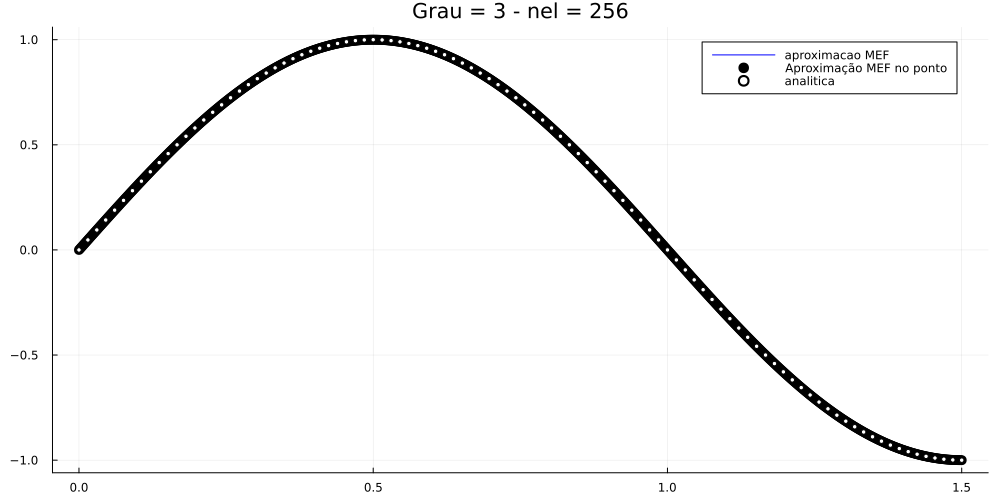

Para k = 4 e nel = 256 e nen = 5 e nint = 5
SHG:
[0.6577278825775881, 0.022063103295100202, 0.0, -0.006618786099995509, -0.03237267008427455]
[0.6076926946610149, 1.0587971821717581, -0.0, 0.03922234075058373, 0.1755341081074129]
[-0.40858201526174176, -0.11346384011744672, 1.0, -0.11346384011744673, -0.40858201526174176]
[0.17553410810741288, 0.03922234075058373, 0.0, 1.0587971821717581, 0.607692694661015]
[-0.03237267008427455, -0.00661878609999551, -0.0, 0.0220631032951002, 0.6577278825775882]

DSHG original:
[3.157918213674122, 0.6500852780101328, -0.16666666666666666, 0.17637818035929462, -0.20660389426577222]
[-5.055639151533484, 1.3799995867516284, 1.3333333333333333, -1.0329265034904829, 1.153010512716783]
[2.8441275563103705, -2.8866331878929494, 0.0, 2.8866331878929494, -2.8441275563103705]
[-1.153010512716783, 1.0329265034904829, -1.3333333333333333, -1.3799995867516284, 5.055639151533484]
[0.20660389426577222, -0.17637818035929462, 0.16666666666666666, -0.6500852780101328, 

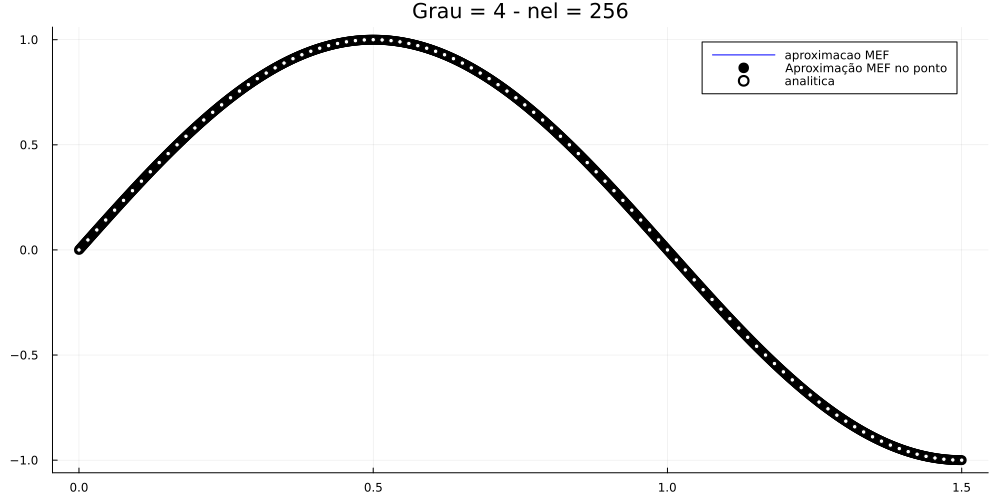

Para k = 1 e nel = 1024 e nen = 2 e nint = 2
SHG:
[0.7886751345948129, 0.21132486540518713]
[0.21132486540518713, 0.7886751345948129]

DSHG original:
[0.5, 0.5]
[-0.5, -0.5]
0
-3.141592653589793


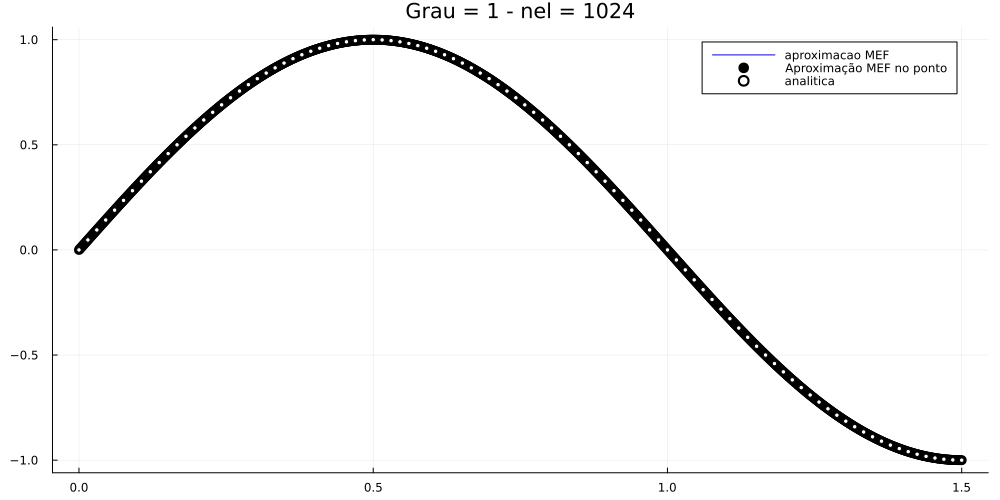

Para k = 2 e nel = 1024 e nen = 3 e nint = 3
SHG:
[-0.08729833462074169, -0.0, 0.6872983346207417]
[0.39999999999999997, 1.0, 0.39999999999999997]
[0.6872983346207417, 0.0, -0.08729833462074169]

DSHG original:
[-1.2745966692414834, -0.5, 0.2745966692414834]
[1.5491933384829668, -0.0, -1.5491933384829668]
[-0.2745966692414834, 0.5, 1.2745966692414834]
0
-3.141592653589793


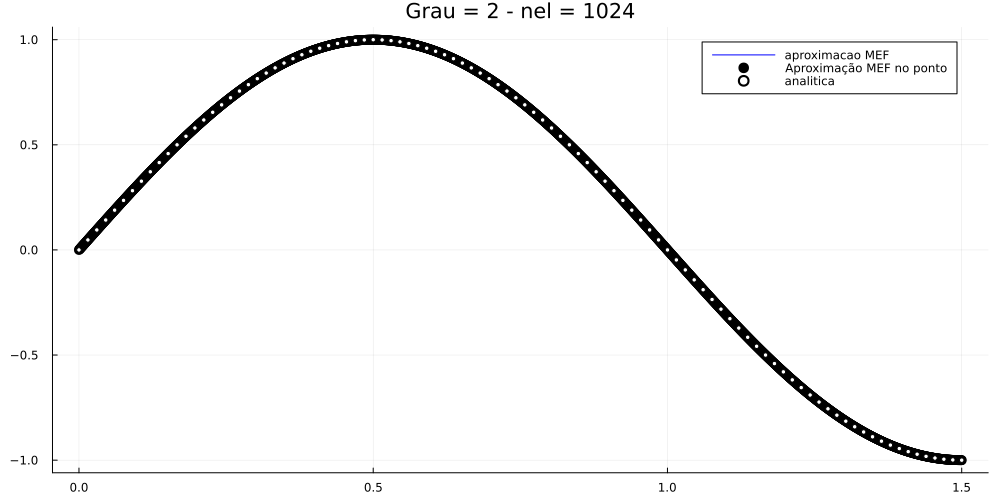

Para k = 3 e nel = 1024 e nen = 4 e nint = 4
SHG:
[0.04924455046623183, 0.0016617623139064115, 0.003373736432772566, 0.6600056650728034]
[-0.23018790325073898, -0.009921353572324754, 1.0048858548256459, 0.5209376877117037]
[0.5209376877117037, 1.0048858548256459, -0.009921353572324754, -0.23018790325073896]
[0.6600056650728034, 0.0033737364327725665, 0.0016617623139064115, 0.049244550466231836]

DSHG original:
[0.22009697276524376, -0.24992542591294495, 0.5150319221529818, 2.157653673851862]
[-1.0978476193823505, 1.484818929672908, 0.7198615816069813, -3.035404320468969]
[3.035404320468969, -0.7198615816069813, -1.484818929672908, 1.0978476193823505]
[-2.157653673851862, -0.5150319221529818, 0.24992542591294495, -0.22009697276524376]
0
-3.141592653589793


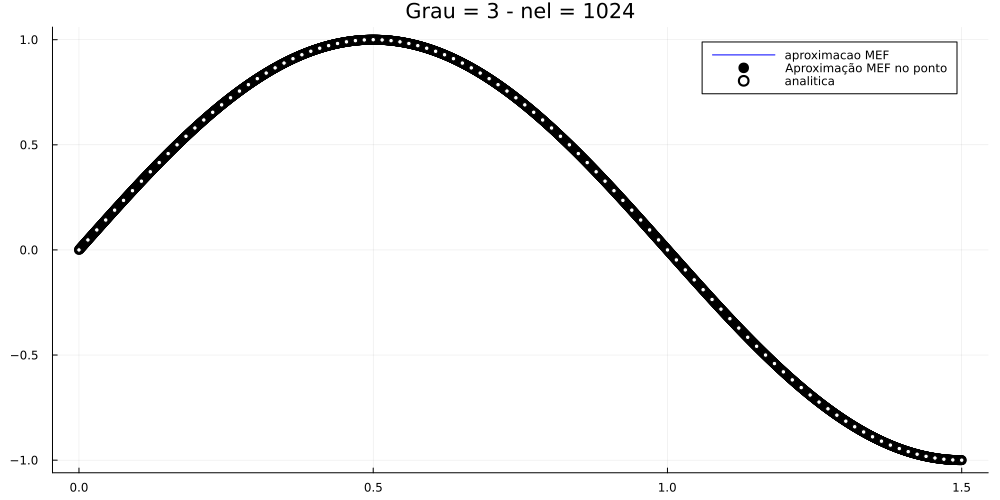

Para k = 4 e nel = 1024 e nen = 5 e nint = 5
SHG:
[0.6577278825775881, 0.022063103295100202, 0.0, -0.006618786099995509, -0.03237267008427455]
[0.6076926946610149, 1.0587971821717581, -0.0, 0.03922234075058373, 0.1755341081074129]
[-0.40858201526174176, -0.11346384011744672, 1.0, -0.11346384011744673, -0.40858201526174176]
[0.17553410810741288, 0.03922234075058373, 0.0, 1.0587971821717581, 0.607692694661015]
[-0.03237267008427455, -0.00661878609999551, -0.0, 0.0220631032951002, 0.6577278825775882]

DSHG original:
[3.157918213674122, 0.6500852780101328, -0.16666666666666666, 0.17637818035929462, -0.20660389426577222]
[-5.055639151533484, 1.3799995867516284, 1.3333333333333333, -1.0329265034904829, 1.153010512716783]
[2.8441275563103705, -2.8866331878929494, 0.0, 2.8866331878929494, -2.8441275563103705]
[-1.153010512716783, 1.0329265034904829, -1.3333333333333333, -1.3799995867516284, 5.055639151533484]
[0.20660389426577222, -0.17637818035929462, 0.16666666666666666, -0.6500852780101328,

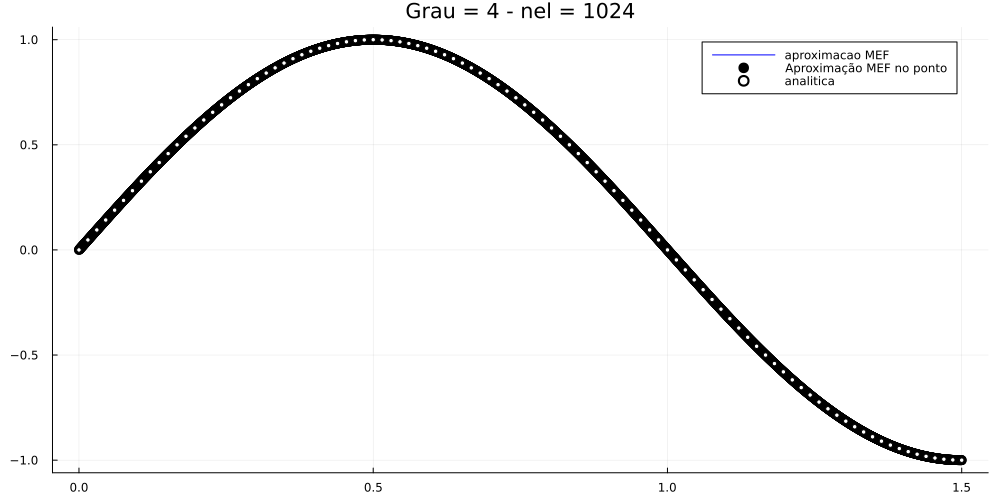

In [280]:
function mef(max_degree) # begin function
    n_values = [4^i for i in 1:5]
    xi = a
    xf = b
    
    # definindo as condições de contorno de Dirichlet
    g_a = 0
    g_b = u(xf)
    
    # definindo as condições de contorno de Neumann
    q_a = du(xi)
    q_b = 0
    
    # definindo os Kappas
    kappa_a = 0
    kappa_b = 10^6
    
    for nel in n_values #f1
        
        for k in 1:4 #f2
            
            nint = k + 1 # número de pontos de integração na malha
            nen = nint # número de elementos na malha
            
            np = nel*k + 1 # número de nós na malha
            println("Para k = $k e nel = $nel e nen = $nen e nint = $nint")
            x = LinRange(xi, xf, np)
            M = zeros(np, np)
            F = zeros(np)
            # println("nen = $nen e nint = $nint")
            shg  = shl(1, nen, nint)
            println("SHG:")
            for i in 1:size(shg, 1)
                println(shg[i, :])
            end
            
            dshg = shl(2, nen, nint)
            dshg = reverse((dshg))
            println("\nDSHG original:")
            for i in 1:size(dshg, 1)
                println(dshg[i, :])
            end
            
            t = pe(nint)
            w = we(nint)
            # println(t)
            # println(w)
            # return 0
            idx = 1
            
            h = (x[k+1] - x[1])
            
            for n in 1:(nel) #f3
                Me = zeros(nint, nint)
                Fe = zeros(nint)
                
                for l in 1:(nint) #f4
                    
                    for j in 1:(nen) #f5
                        
                        tt = t[l]
                        ww = w[l]
                        Fe[j] += u_correct(tt, x[idx], x[idx+k]) * shg[j, l] * ww * h/2
                        # println("\npara l = $l, j = $j:")
                        # println("shg[j, l] = $(shg[j, l])")
                        # println("sum_parc $(u_correct(tt, x[idx], x[idx+k]) * shg[j, l] * ww * h/2)")
                        # println("t = $tt")
                        # println("ww = $ww")
                        # println("h = $h")
                        # println("idx = $idx")
                        # println("x[idx] = $(x[idx]) x[idx+k] = $(x[idx+k])")
                        # println("u_correct = $(u_correct(tt, x[idx], x[idx+k]))")
                        # println(Fe)
                        # return 0
                        for i in 1:nen #f6
                            Me[i, j] += dshg[i, l] * dshg[j, l] * ww * 2/h
                            # sum_parc = dshg[i, l] * dshg[j, l] * ww * 2/h
                            
                            # println("\ni = $i, j = $j, l = $l")
                            # println("Está sendo somado:$sum_parc")
                            # println("t = $tt")
                            # println("dshg_i = $(dshg[i, l])")
                            # println("dshg_j = $(dshg[j, l])")
                            # println("Matriz local em i = $i e j = $j")
                            # println(Me)
                            # return 0
                        end #ef6
                            
                    end #ef5
                    
                end #ef4
                # println("Matrizes locais para n = $n")
                # for q in 1:size(Fe, 1)
                #     println(Fe[q, :])
                # end
                # println("\n")
                # for q in 1:size(Me, 1)
                #     println(Me[q, :])
                # end
                for i in 0:nint-1 #f7
                    F[idx+i] += Fe[i+1]
                    for j in 0:nint-1 #f8
                        M[idx+i, idx+j] += Me[i+1, j+1]
                    end #ef7
                end #ef7
                
                
                # println("\nMatrizes quando n = $n:")
                # for q in 1:size(F, 1)
                #     println(F[q, :])
                # end
                # println("\n")
                # for q in 1:size(M, 1)
                #     println(M[q, :])
                # end
                idx += k
            end #ef3
            # aplicando as condições de contorno
            
            # println("Matrizes antes das condições de contorno:")
            # println(M)
            # println(F)
            # return 0
            
            M[1, 1] += kappa_a
            F[1] += kappa_a*g_a - q_a
            
            println(kappa_a)
            println(kappa_a*g_a - q_a)
            
            M[size(M)[1], size(M)[2]] += kappa_b
            F[size(F)[1]] += kappa_b*g_b - q_b
            
            # println("Matrizes após das condições de contorno:")
            # println(M)
            # println(F)
            
            alphas = M\F
            # println("Solução para k = $k")
            
            # println(alphas)
            
            fig = plot(size=(1000, 500))
            plot!(x, alphas, label="aproximacao MEF", color="blue")  # Continuous line
            plot!(x, alphas, label="Aproximação MEF no ponto", color="black", seriestype=:scatter, ms=5.5)  # Scatter plot for MEF
            plot!(range(a, stop=b, length=100), x -> u(x), seriestype=:scatter, label="analitica", ms=2.5, color="white")  # Scatter plot
            title!("Grau = $k - nel = $nel")
            plot!(grid=true)  # Enable the grid
            # # savefig("grafico_nel$(nel)_grau$(k).png")
            # # savefig(joinpath(folder_to_save, "grafico_nel_$(nel)_grau$(k).png"))
            # # download("grafico_nel$nel_grau$k.png")  # Uncomment if you want to download the file
            # # legend!("upper right")
            display(fig)
            # return 0
        end #ef2
        
    end #ef1
    
end # end function
;
mef(5)
;

In [281]:
u(b)

-1.0

In [282]:
du(a)

3.141592653589793

In [283]:
x = LinRange(a, b, 2*4 + 1)

for i in 1:(size(x)[1])
  print("$(x[i])  ")
end

0.0  0.1875  0.375  0.5625  0.75  0.9375  1.125  1.3125  1.5  